<a href="https://colab.research.google.com/github/AROP019/Proyecto-PrediccionIndicadores/blob/main/Vul_Car_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Preparación Datos



In [16]:
datos = pd.read_csv('df3_prueba.csv')
datos.head(5)

,municipio,vul_car_pob,NOM_MUN,NOM_LOC,PCON_LIMI,PHOG_IND,P5_HLI_NHE,PCON_DISC,VPH_PISODT,VPH_S_ELEC
0,Aguascalientes,"257,144",Aguascalientes,Total del Municipio,116705.0,4050.0,8.0,47525.0,264662.0,438.0
1,Asientos,"19,243",Asientos,Total del Municipio,4551.0,43.0,0.0,2886.0,12330.0,95.0
2,Calvillo,"21,199",Calvillo,Total del Municipio,6760.0,173.0,1.0,4088.0,15336.0,112.0
3,Cosío,"5,138",Cosío,Total del Municipio,1933.0,15.0,0.0,805.0,3891.0,25.0
4,Jesús María,"42,186",Jesús María,Total del Municipio,11904.0,395.0,1.0,5036.0,32719.0,155.0


In [17]:
print(datos.columns)


Index(['municipio', 'vul_car_pob', 'NOM_MUN', 'NOM_LOC', 'PCON_LIMI',
       'PHOG_IND', 'P5_HLI_NHE', 'PCON_DISC', 'VPH_PISODT', 'VPH_S_ELEC'],
      dtype='object')


In [18]:
# Eliminar columnas no numéricas

datos.drop(columns='municipio', inplace=True)
datos.drop(columns='NOM_MUN', inplace=True)
datos.drop(columns='NOM_LOC', inplace=True)

In [19]:
(datos.head())

,vul_car_pob,PCON_LIMI,PHOG_IND,P5_HLI_NHE,PCON_DISC,VPH_PISODT,VPH_S_ELEC
0,"257,144",116705.0,4050.0,8.0,47525.0,264662.0,438.0
1,"19,243",4551.0,43.0,0.0,2886.0,12330.0,95.0
2,"21,199",6760.0,173.0,1.0,4088.0,15336.0,112.0
3,"5,138",1933.0,15.0,0.0,805.0,3891.0,25.0
4,"42,186",11904.0,395.0,1.0,5036.0,32719.0,155.0


In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vul_car_pob  2469 non-null   object 
 1   PCON_LIMI    2440 non-null   float64
 2   PHOG_IND     2440 non-null   float64
 3   P5_HLI_NHE   2440 non-null   float64
 4   PCON_DISC    2440 non-null   float64
 5   VPH_PISODT   2440 non-null   float64
 6   VPH_S_ELEC   2440 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.2+ KB


In [21]:
# Reemplaza 'n.d' con NaN en y
datos.replace('n.d', np.nan, inplace=True)
datos['vul_car_pob'] = datos['vul_car_pob'].str.replace(',', '').astype(float)
datos.fillna(datos.median(), inplace=True)

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vul_car_pob  2469 non-null   float64
 1   PCON_LIMI    2469 non-null   float64
 2   PHOG_IND     2469 non-null   float64
 3   P5_HLI_NHE   2469 non-null   float64
 4   PCON_DISC    2469 non-null   float64
 5   VPH_PISODT   2469 non-null   float64
 6   VPH_S_ELEC   2469 non-null   float64
dtypes: float64(7)
memory usage: 135.2 KB


In [23]:
datos = datos.astype(float)

In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vul_car_pob  2469 non-null   float64
 1   PCON_LIMI    2469 non-null   float64
 2   PHOG_IND     2469 non-null   float64
 3   P5_HLI_NHE   2469 non-null   float64
 4   PCON_DISC    2469 non-null   float64
 5   VPH_PISODT   2469 non-null   float64
 6   VPH_S_ELEC   2469 non-null   float64
dtypes: float64(7)
memory usage: 135.2 KB


from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = datos.drop("vul_car_pob", axis=1)
y = datos["vul_car_pob"]


X_scaled = scaler.fit_transform(X)  # Normaliza todas las variables en X
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

datos[X.columns] = X_scaled
datos["vul_car_pob"] = y

varianza_y = y.var()
desviacion_y = y.std()

print(f"Varianza de y: {varianza_y}")
print(f"Desviación estándar de y: {desviacion_y}")

modelo_rf = RandomForestRegressor()
modelo_rf.fit(X, y)

importancias = modelo_rf.feature_importances_
columnas_importantes = X.columns[np.argsort(importancias)[-10:]]  # Las 10 más importantes

print(columnas_importantes)


In [25]:
datos['vul_car_pob'].max()

728225.0

In [26]:
# Obtener el valor máximo de la columna 'vul_car_pob'
valor_max = datos['vul_car_pob'].max()

# Encontrar el índice de la fila con el valor máximo
indice_max = datos[datos['vul_car_pob'] == valor_max].index

# Eliminar la fila con el valor máximo
datos = datos.drop(indice_max)


In [27]:
datos['vul_car_pob'].max()

459843.0

In [28]:
datos.shape

(2468, 7)

In [29]:
print(datos.isnull().sum())

vul_car_pob    0
PCON_LIMI      0
PHOG_IND       0
P5_HLI_NHE     0
PCON_DISC      0
VPH_PISODT     0
VPH_S_ELEC     0
dtype: int64


In [30]:
datos

,vul_car_pob,PCON_LIMI,PHOG_IND,P5_HLI_NHE,PCON_DISC,VPH_PISODT,VPH_S_ELEC
0,257144.0,116705.0,4050.0,8.0,47525.0,264662.0,438.0
1,19243.0,4551.0,43.0,0.0,2886.0,12330.0,95.0
2,21199.0,6760.0,173.0,1.0,4088.0,15336.0,112.0
3,5138.0,1933.0,15.0,0.0,805.0,3891.0,25.0
4,42186.0,11904.0,395.0,1.0,5036.0,32719.0,155.0
...,...,...,...,...,...,...,...
2464,3457.0,2233.0,7.0,0.0,1404.0,4877.0,33.0
2465,9999.0,3954.0,33.0,0.0,2129.0,8933.0,75.0
2466,40313.0,20144.0,1078.0,10.0,8455.0,42116.0,77.0
2467,3501.0,1958.0,39.0,0.0,1020.0,4590.0,27.0


In [31]:
print(datos.isnull().sum())

vul_car_pob    0
PCON_LIMI      0
PHOG_IND       0
P5_HLI_NHE     0
PCON_DISC      0
VPH_PISODT     0
VPH_S_ELEC     0
dtype: int64


In [32]:
# Definir las columnas a utilizar

from sklearn.preprocessing import StandardScaler

columnas_utilizar = datos.columns[:10]

# Separar las variables predictoras (X) y la variable objetivo (y)
X = datos[columnas_utilizar].drop(columns=["vul_car_pob"])
y = datos["vul_car_pob"]

# Identificar las columnas categóricas en X
columnas_categoricas = X.select_dtypes(include=["object"]).columns

# Convertir las variables categóricas en variables dummy (one-hot encoding)
X = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# Separar el conjunto de datos en entrenamiento y prueba (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Escalar train y test por separado
scaler_train = StandardScaler()
scaler_test = StandardScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)



In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columnas_numericas = datos.select_dtypes(include=['int64', 'float64']).columns
datos[columnas_numericas] = scaler.fit_transform(datos[columnas_numericas])


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de regresión lineal
modelo_lr = LinearRegression()

# Entrenar el modelo
modelo_lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = modelo_lr.predict(X_test)

# Calcular MSE y R^2
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Modelo: Regresión Lineal")
print(f"MSE: {mse_lr:.4f}, R^2: {r2_lr:.4f}")


Modelo: Regresión Lineal
MSE: 65349022.6585, R^2: 0.9582


In [35]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de árbol de decisión
modelo_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo
modelo_tree.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = modelo_tree.predict(X_test)

# Calcular MSE y R^2
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Modelo: Árbol de Decisión")
print(f"MSE: {mse_tree:.4f}, R^2: {r2_tree:.4f}")


Modelo: Árbol de Decisión
MSE: 65613771.4258, R^2: 0.9581


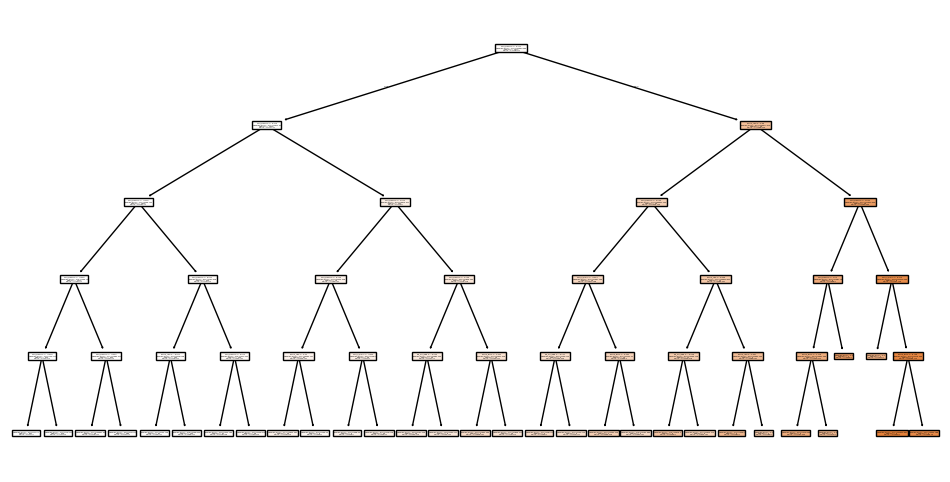

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 6))
plot_tree(modelo_tree, filled=True, feature_names=X.columns)
plt.show()


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de random forest
modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Calcular MSE y R^2
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Modelo: Random Forest")
print(f"MSE: {mse_rf:.4f}, R^2: {r2_rf:.4f}")


Modelo: Random Forest
MSE: 69865306.5538, R^2: 0.9554


In [38]:

print(datos.describe())
print(datos.dtypes)


        vul_car_pob     PCON_LIMI      PHOG_IND    P5_HLI_NHE     PCON_DISC  \
count  2.468000e+03  2.468000e+03  2.468000e+03  2.468000e+03  2.468000e+03   
mean   1.151609e-17  1.151609e-17  3.454827e-17  5.758045e-18 -2.303218e-17   
std    1.000203e+00  1.000203e+00  1.000203e+00  1.000203e+00  1.000203e+00   
min   -3.530082e-01 -3.518733e-01 -3.957139e-01 -1.772149e-01 -3.684234e-01   
25%   -3.316474e-01 -3.169880e-01 -3.882911e-01 -1.772149e-01 -3.256819e-01   
50%   -2.720333e-01 -2.523250e-01 -3.414350e-01 -1.755210e-01 -2.507710e-01   
75%   -1.000064e-01 -1.054760e-01 -5.903264e-02 -1.465828e-01 -8.701673e-02   
max    1.184144e+01  1.466408e+01  1.633814e+01  2.304106e+01  1.540183e+01   

         VPH_PISODT    VPH_S_ELEC  
count  2.468000e+03  2.468000e+03  
mean   1.151609e-17 -5.758045e-18  
std    1.000203e+00  1.000203e+00  
min   -3.331787e-01 -4.738294e-01  
25%   -3.056757e-01 -4.073455e-01  
50%   -2.513416e-01 -2.832423e-01  
75%   -1.226884e-01  5.962354e-03  


In [39]:
from xgboost import XGBRegressor

modelo_xgb = XGBRegressor()
modelo_xgb.fit(X, y)
y_pred = modelo_xgb.predict(X)

from sklearn.metrics import r2_score
print("R^2:", r2_score(y, y_pred))

mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

R^2: 0.9864182839998341
MSE: 19312999.458811708


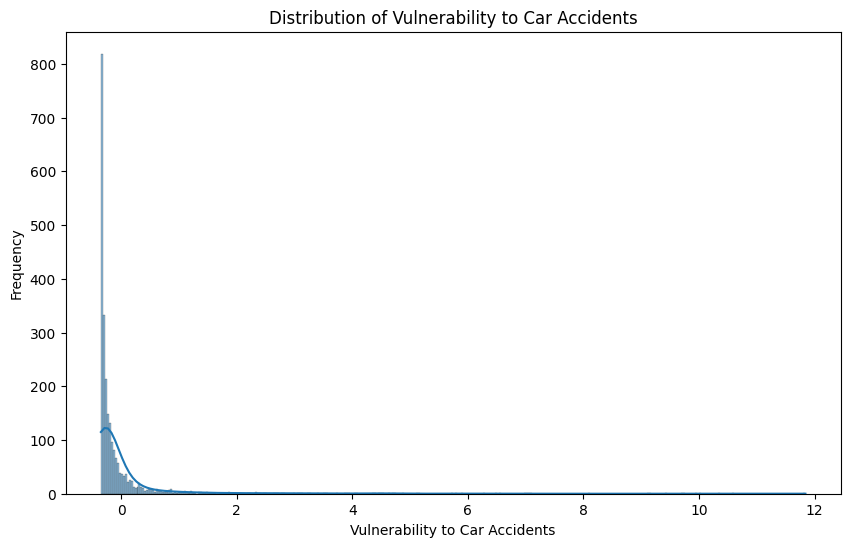

In [40]:
# prompt: plot distribution of df['vul_car_pob'].

# Plot the distribution of 'vul_car_pob'
plt.figure(figsize=(10, 6))
sns.histplot(datos['vul_car_pob'], kde=True)
plt.title('Distribution of Vulnerability to Car Accidents')
plt.xlabel('Vulnerability to Car Accidents')
plt.ylabel('Frequency')
plt.show()


In [41]:
datos['vul_car_pob'].max()

11.841436792591796

In [42]:
# prompt: erase outlier of df['vul_car_pob'].

# Calculate the IQR
Q1 = datos['vul_car_pob'].quantile(0.25)
Q3 = datos['vul_car_pob'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
datos = datos[(datos['vul_car_pob'] >= lower_bound) & (datos['vul_car_pob'] <= upper_bound)]


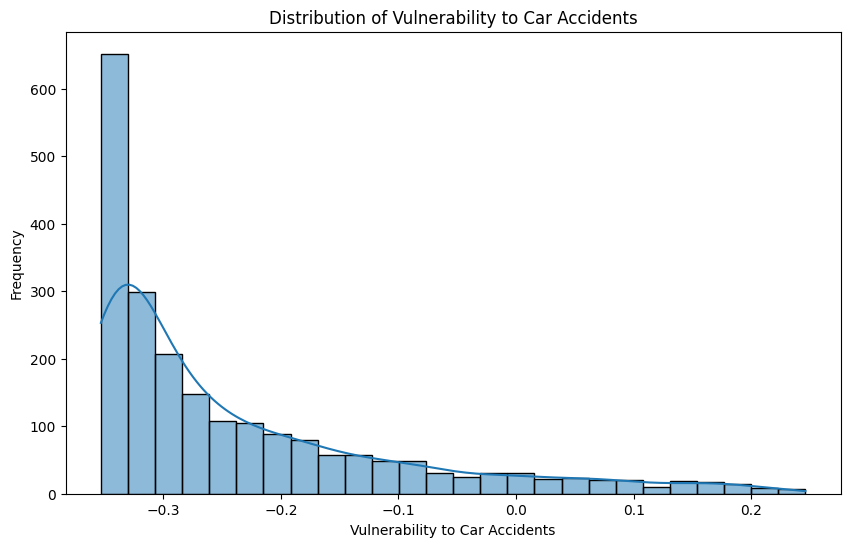

In [43]:
# prompt: plot distribution of df['vul_car_pob'].

# Plot the distribution of 'vul_car_pob'
plt.figure(figsize=(10, 6))
sns.histplot(datos['vul_car_pob'], kde=True)
plt.title('Distribution of Vulnerability to Car Accidents')
plt.xlabel('Vulnerability to Car Accidents')
plt.ylabel('Frequency')
plt.show()


In [44]:
datos['vul_car_pob'].max()

0.2459965355931093

In [45]:
# prompt: erase outlier of df['vul_car_pob'].

# Calculate the IQR
Q1 = datos['vul_car_pob'].quantile(0.25)
Q3 = datos['vul_car_pob'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
datos = datos[(datos['vul_car_pob'] >= lower_bound) & (datos['vul_car_pob'] <= upper_bound)]


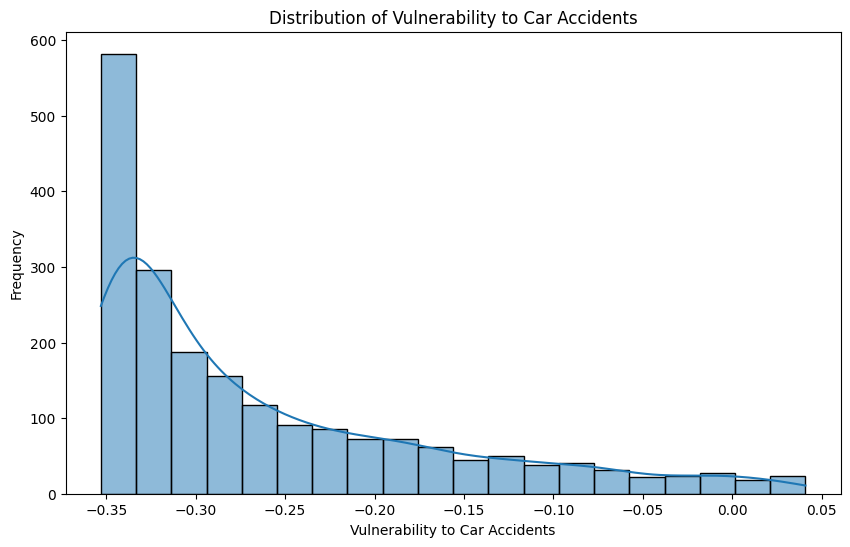

In [46]:
# prompt: plot distribution of df['vul_car_pob'].

# Plot the distribution of 'vul_car_pob'
plt.figure(figsize=(10, 6))
sns.histplot(datos['vul_car_pob'], kde=True)
plt.title('Distribution of Vulnerability to Car Accidents')
plt.xlabel('Vulnerability to Car Accidents')
plt.ylabel('Frequency')
plt.show()


In [47]:
datos['vul_car_pob'].max()

0.040900802102062116

Entrenamiento:

#XGBOOST

##Sin Gridsearch


R^2: 0.9821


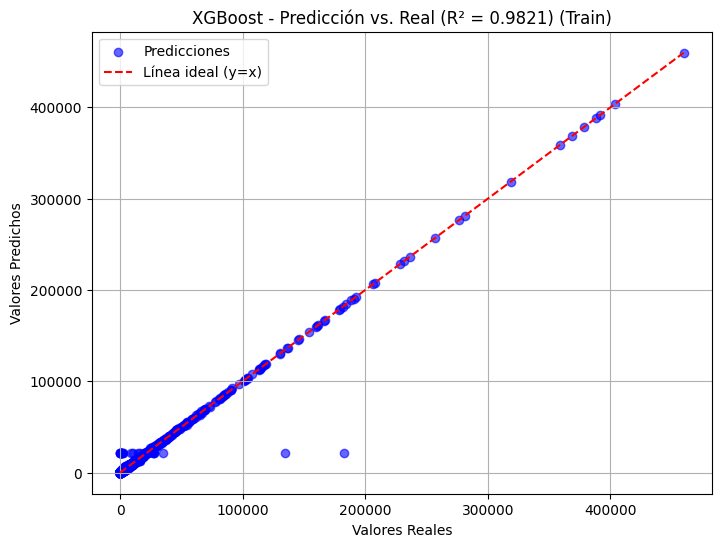

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


# Entrenar el modelo XGBoost
modelo_xgb = XGBRegressor()
modelo_xgb.fit(X_train, y_train)
y_pred = modelo_xgb.predict(X_train)

# Calcular R^2
r2 = r2_score(y_train, y_pred)
print(f"R^2: {r2:.4f}")

# Gráfico de dispersión: Valores reales vs. Predichos
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred, alpha=0.6, label="Predicciones", color="blue")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle="--", color="red", label="Línea ideal (y=x)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"XGBoost - Predicción vs. Real (R² = {r2:.4f}) (Train)")
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt




R^2: 0.9364


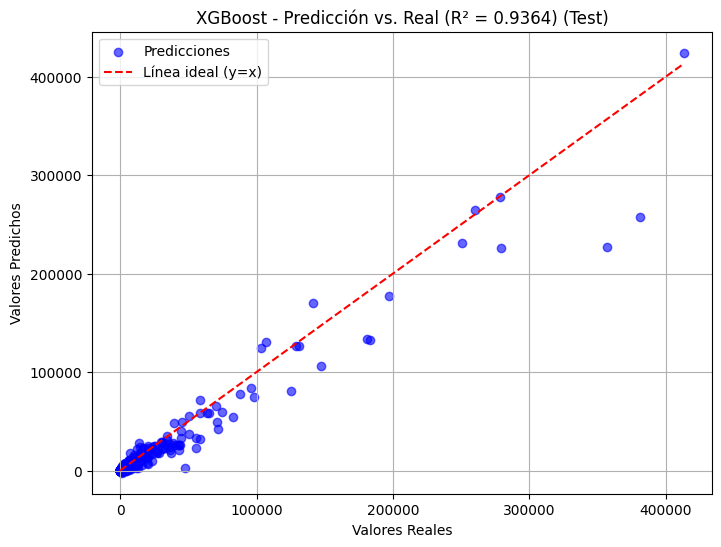

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Predecir sobre el conjunto de prueba
y_pred = modelo_xgb.predict(X_test)

# Calcular R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.4f}")

# Gráfico de dispersión: Valores reales vs. Predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Línea ideal (y=x)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"XGBoost - Predicción vs. Real (R² = {r2:.4f}) (Test)")
plt.legend()
plt.grid(True)
plt.show()



##ConGridSearch

In [ ]:
# Definir las columnas a utilizar
columnas_utilizar = datos.columns[:10]

# Separar las variables predictoras (X) y la variable objetivo (y)
X = datos[columnas_utilizar].drop(columns=["vul_car_pob"])
y = datos["vul_car_pob"]

# Identificar las columnas categóricas en X
columnas_categoricas = X.select_dtypes(include=["object"]).columns

# Convertir las variables categóricas en variables dummy (one-hot encoding)
X = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# Separar el conjunto de datos en entrenamiento y prueba (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# Escalar train y test por separado
scaler_train = StandardScaler()
scaler_test = StandardScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)

y_train = scaler_train.fit_transform(y_train.values.reshape(-1, 1))  # Reshape y_train to 2D
y_test = scaler_test.fit_transform(y_test.values.reshape(-1, 1))  # Reshape y_test to 2D


R² en entrenamiento: 0.8160
RMSE en entrenamiento: 0.4290


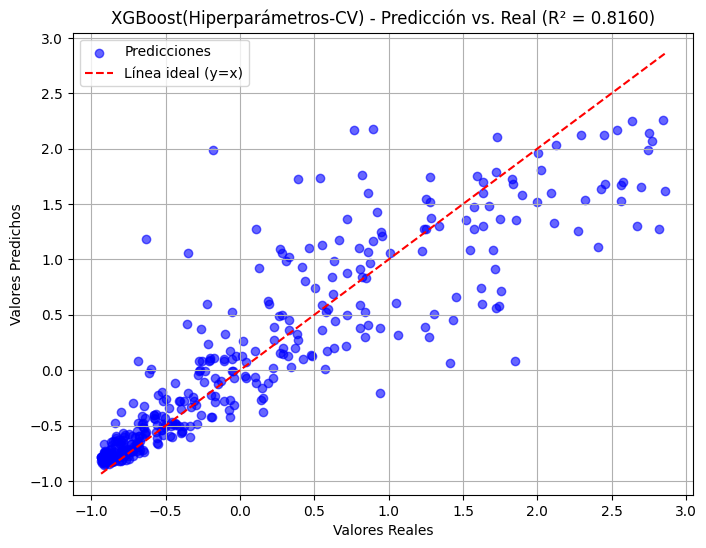

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Definir el modelo XGBoost
modelo_xgb = XGBRegressor(objective='reg:squarederror')

# Definir los posibles valores para los hiperparámetros
parametros_XGB = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Usar RandomizedSearchCV para encontrar los mejores hiperparámetros
random_search_XGB = RandomizedSearchCV(estimator=modelo_xgb, param_distributions=parametros_XGB,
                                       n_iter=20, cv = 10, scoring='neg_mean_squared_error')

random_search_XGB.fit(X_train, y_train)

# Mejor modelo encontrado
mejor_modelo = random_search_XGB.best_estimator_

# Predicciones en el conjunto de entrenamiento
y_pred = mejor_modelo.predict(X_test)

# Calcular R^2 y RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² en entrenamiento: {r2:.4f}")
print(f"RMSE en entrenamiento: {rmse:.4f}")

# Gráfico de dispersión: Valores reales vs. Predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Línea ideal (y=x)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"XGBoost(Hiperparámetros-CV) - Predicción vs. Real (R² = {r2:.4f})")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Mejores hiperparámetros encontrados:", random_search_XGB.best_params_)

Mejores hiperparámetros encontrados: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


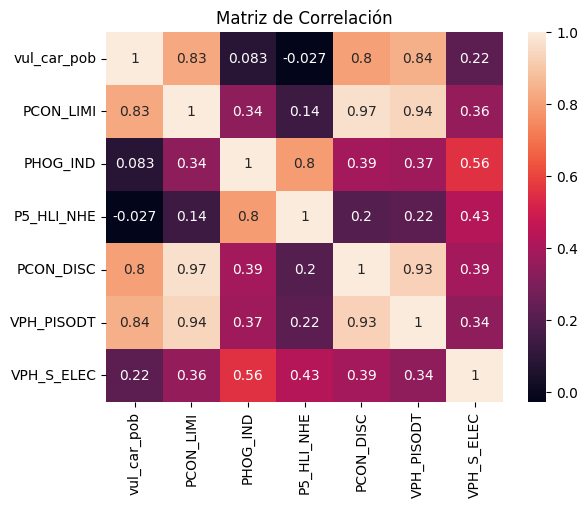

In [48]:
#Revisar correlación de variables
correlacion = datos.corr()
sns.heatmap(correlacion, annot=True)
plt.title('Matriz de Correlación')
plt.show()